In [1]:
import bilby
import matplotlib.pyplot as plt
import numpy as np
from bilby.core.utils import random
from bilby.core.prior import PriorDict, DeltaFunction

from scipy.signal import get_window
from scipy.fft import fft, fftfreq

random.seed(123)

In [2]:
#Exercise 1: Sinusoid 

# Setup
outdir_ex1 = "outdir_ex2"
bilby.utils.check_directory_exists_and_if_not_mkdir(outdir_ex1)
label_ex1 = "damped_sinusoidal_FFT"

sampling_frequency_ex1 = 256
time_duration_ex1 = 3

time_ex1 = np.arange(0, time_duration_ex1, 1/sampling_frequency_ex1) 
freq_ex1 = fftfreq(len(time_ex1), 1/sampling_frequency_ex1)

injection_parameters_ex1 = dict(
    A=1e-22,  
    f=150.0,  
    phi=0.0,
    geocent_time=0,
    ra=1.375,
    dec=-1.2108,
    psi=2.659
)


def model_ex1(time, A, f, phi, **kwargs):
        N = len(time)
        sinusoid = ((A / (time + 1))*np.sin(2*np.pi*f*(time + 1)) + phi)
        window = get_window('hann', N)
        return dict (plus=sinusoid*window, cross=sinusoid*window) 
        # return sinusoid*window

waveform_generator = bilby.gw.WaveformGenerator(
    duration=time_duration_ex1,
    sampling_frequency=sampling_frequency_ex1,
    time_domain_source_model=model_ex1,
    start_time=0,
)

# ifos = bilby.gw.detector.InterferometerList(["H1", "L1"])
ifos = bilby.gw.detector.InterferometerList(["H1"])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency_ex1,
    duration=time_duration_ex1,
    start_time=0,
    
)
ifos.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters_ex1, raise_error=False
)

15:42 bilby INFO    : Waveform generator instantiated: WaveformGenerator(duration=3, sampling_frequency=256, start_time=0, frequency_domain_source_model=None, time_domain_source_model=__main__.model_ex1, parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters, waveform_arguments={})
15:42 bilby INFO    : Generation of mass parameters failed with message 'mass_1'
15:42 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
15:42 bilby INFO    : Generation of source frame parameters failed with message 'luminosity_distance'
15:42 bilby INFO    : Injected signal in H1:
15:42 bilby INFO    :   optimal SNR = 6.41
15:42 bilby INFO    :   matched filter SNR = 6.75-0.12j
15:42 bilby INFO    :   A = 1e-22
15:42 bilby INFO    :   f = 150.0
15:42 bilby INFO    :   phi = 0.0
15:42 bilby INFO    :   geocent_time = 0
15:42 bilby INFO    :   ra = 1.375
15:42 bilby INFO    :   dec = -1.2108
15:42 bilby INFO    :   psi = 2.659


[{'plus': array([ 3.65123535e-31+0.00000000e+00j,  3.65151064e-31-3.24451026e-35j,
          3.65232588e-31-6.52491113e-35j,  3.65368998e-31-9.73102146e-35j,
          3.65559995e-31-1.30647121e-34j,  3.65804680e-31-1.62421300e-34j,
          3.66105461e-31-1.95791568e-34j,  3.66461080e-31-2.27857648e-34j,
          3.66870200e-31-2.61469486e-34j,  3.67335314e-31-2.93833394e-34j,
          3.67855808e-31-3.27047724e-34j,  3.68431110e-31-3.60194340e-34j,
          3.69062534e-31-3.93186859e-34j,  3.69749389e-31-4.26859489e-34j,
          3.70492389e-31-4.60154005e-34j,  3.71291771e-31-4.93840873e-34j,
          3.72147346e-31-5.27759308e-34j,  3.73060105e-31-5.61582474e-34j,
          3.74029760e-31-5.95980632e-34j,  3.75056808e-31-6.30191700e-34j,
          3.76141840e-31-6.64785208e-34j,  3.77284769e-31-6.99751512e-34j,
          3.78486428e-31-7.34577975e-34j,  3.79746886e-31-7.70037502e-34j,
          3.81066635e-31-8.05514740e-34j,  3.82446380e-31-8.41306886e-34j,
          3.83886

In [3]:
# priors = bilby.gw.prior.BBHPriorDict(injection_parameters_ex1.copy())

priors = dict()
priors['A'] = bilby.core.prior.Uniform(0.5e-21, 1.5e-21, 'A')
priors['f'] = bilby.core.prior.Uniform(140.0, 160.0, 'f')
priors['phi'] = bilby.core.prior.Uniform(-0.5, 0.5, 'phi')

# Fixed parameters
priors['geocent_time'] = DeltaFunction(0.0, 'geocent_time')
priors['ra'] = DeltaFunction(1.375, 'ra')
priors['dec'] = DeltaFunction(-1.2108, 'dec')
priors['psi'] = DeltaFunction(2.659, 'psi')


likelihood = bilby.gw.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator
)

result = bilby.core.sampler.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sample="rwalk",
    npoints=100,
    injection_parameters=injection_parameters_ex1,
    outdir=outdir_ex1,
    label=label_ex1,
    boostrap=0,
    clean=True
)

15:42 bilby INFO    : Running for label 'damped_sinusoidal_FFT', output will be saved to 'outdir_ex2'
/Users/ved/miniforge3/envs/neutron/lib/python3.12/site-packages/bilby/gw/likelihood/base.py:1143: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import git_version, __version__
15:42 bilby INFO    : Using lal version 7.7.0
15:42 bilby INFO    : Using lal git version Branch: None;Tag: lal-v7.7.0;Id: ef36dfdf49181b9b376a867b55a14463783de545;;Builder: Adam Mercer <ada

1it [00:00, ?it/s]

/Users/ved/miniforge3/envs/neutron/lib/python3.12/site-packages/dynesty/sampler.py:1098: UserWarning: We have reached the plateau in the likelihood we are stopping sampling
  warnings.warn(
15:42 bilby INFO    : Written checkpoint file outdir_ex2/damped_sinusoidal_FFT_resume.pickle
15:42 bilby INFO    : Rejection sampling nested samples to obtain 241 posterior samples
15:42 bilby INFO    : Sampling time: 0:00:36.527867
15:42 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 


15:42 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
15:42 bilby INFO    : Summary of results:
nsamples: 241
ln_noise_evidence: -363.324
ln_evidence: -675.939 +/-  1.005
ln_bayes_factor: -312.615 +/-  1.005



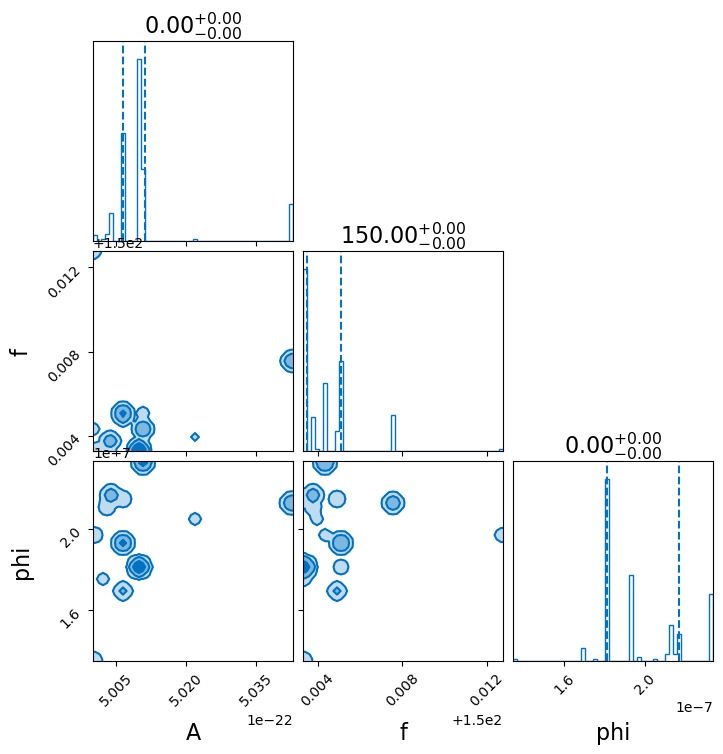

In [4]:
result.plot_corner(save=False)
plt.show()
plt.close()

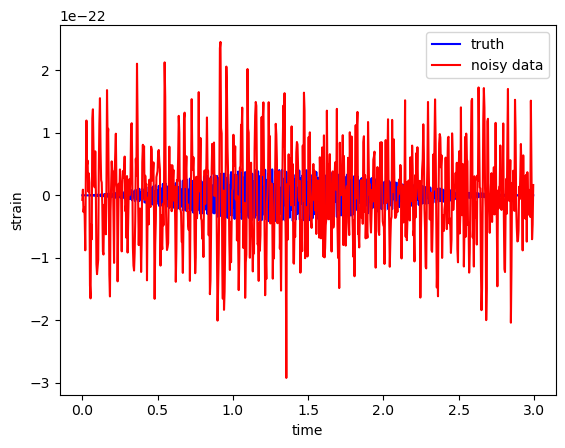

In [5]:
fig, ax = plt.subplots()

ax.plot(time_ex1, waveform_generator.time_domain_strain(injection_parameters_ex1)['plus'], "b", label="truth")
ax.plot(time_ex1, ifos[0].time_domain_strain, "r", label="noisy data")


ax.set_xlabel("time")
ax.set_ylabel("strain")
ax.legend()

/Users/ved/miniforge3/envs/neutron/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ved/miniforge3/envs/neutron/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


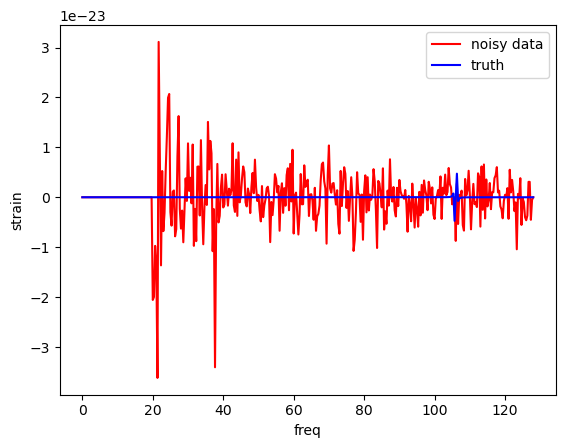

In [6]:
fig, ax = plt.subplots()

ax.plot(ifos[0].frequency_array, ifos[0].frequency_domain_strain, "r", label="noisy data")
ax.plot(ifos[0].frequency_array, waveform_generator.frequency_domain_strain(injection_parameters_ex1)['plus'], "b", label="truth")
ax.set_xlabel("freq")
ax.set_ylabel("strain")
# ax.set_yscale("log")
# ax.set_xlim(100, 120)
ax.legend()